# Importancia del análisis exploratorio

El análisis exploratorio de datos (EDA) es el proceso que nos permite conocer:
- El detalle de nuestros datos
    - que tipo de variables tenemos 
    - la relación entre ellas 
    - patrones de los datos
    - el modelo predictivo correcto
- Determinar como tratarlos (si es necesario hacer imputación o eliminación de valores nulos)
- Transformarlos en información útil.

### Pasos para realizar un EDA
- Hacer preguntas al dataset
- Determinar el tamaño del dataset
- Categorizar nuestras variables
- Limpieza y validación de datos
- Establecer relaciones
Este es un proceso cíclico ya que a medida de que obtengas mayor información o realices limpieza, surgiran nuevas preguntas.

### Tipos de análisis de datos
Pasado
- Descriptiva: ¿Qué sucedio? Provee de ideas sobre eventos del pasado
- Diagnóstica: ¿Por qué? Profundiza en las causas del evento

Futuro
- Predictiva ¿Qué podría pasar si? Utiliza los datos para hacer predicciones
- Prescriptiva ¿Qué debería hacerse? Analiza decisiones del pasado para estimar la probabilidad de diferentes resultados 

Cada una requiere de la anterior hasta llegar al análisis requerido.

### 1. Carga de datos y paquetería

In [1]:
#import empiricaldist
#import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins  # dataset de pinguinos
import pandas as pd
import scipy.stats
import seaborn as sns
#import sklearn.metrics
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#import statsmodels.stats as ss
#import session_info

In [2]:
#descargamos los datos crudos
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
#datos ya procesados y limpios
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
# seaborn tienen un dataset muy parecido a este
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


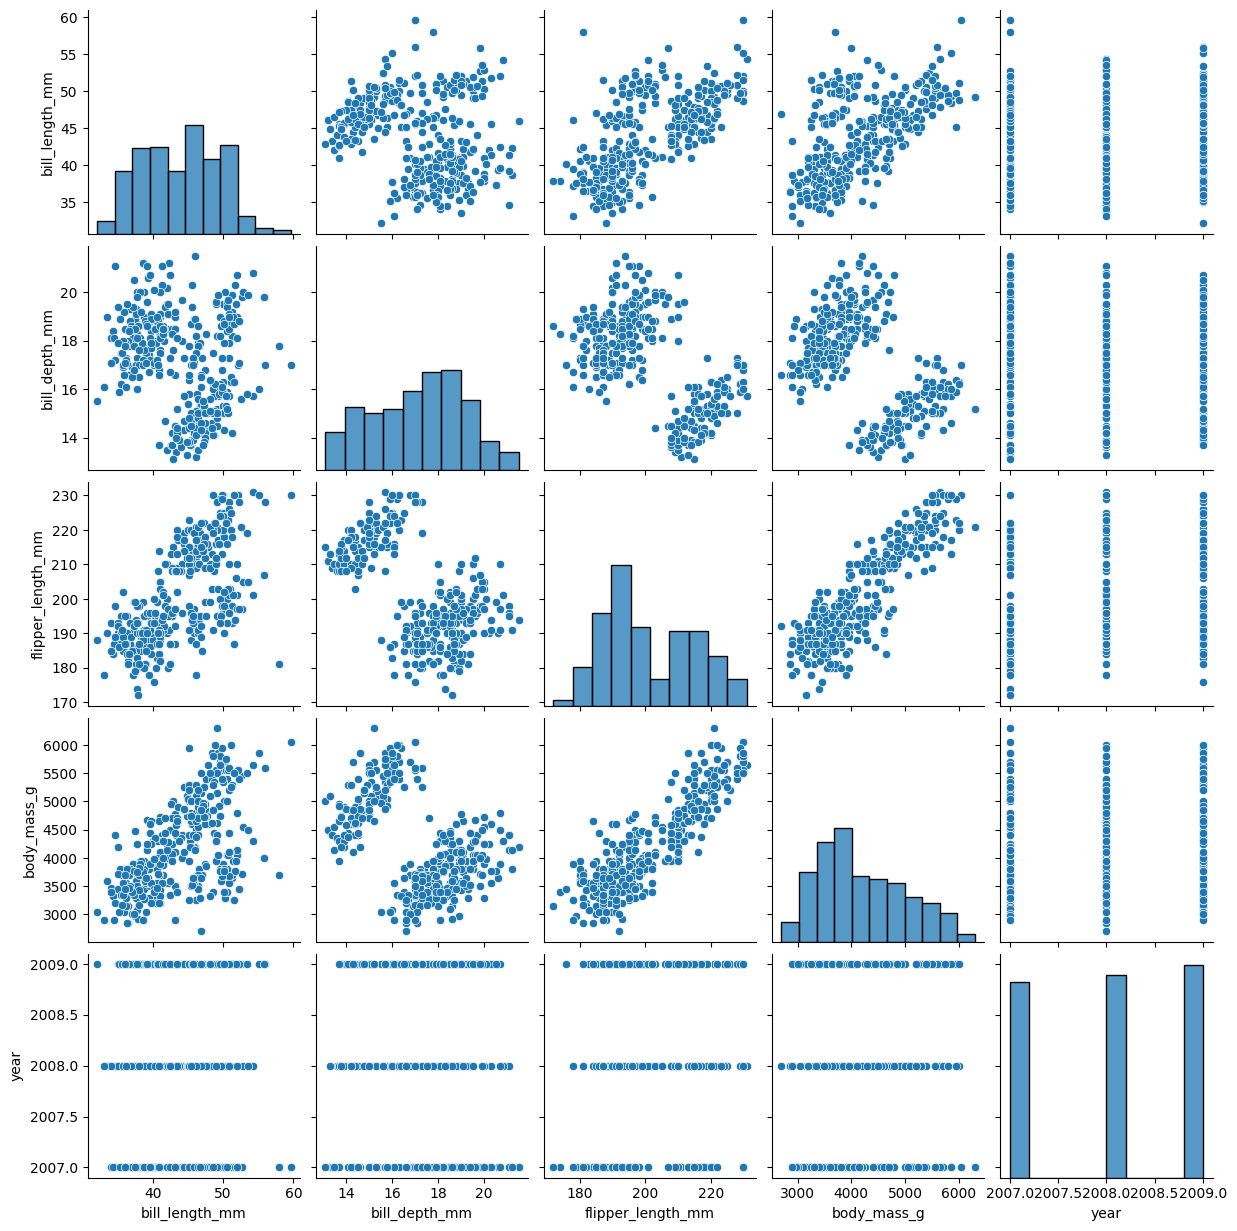

In [5]:
#graficasmos las distribuciones y graficas de dispersion
sns.pairplot(preprocess_penguins_df)

### Validación de datos
Es el proceso de asegurar la conssitencia y precisión, debemos validar varios puntos para decir que los datos son consistentes:
- Modelo de datos: ¿Los datos que estoy recolectando son suficientes o son los correctos para responder las preguntas?
- Formato estándar de archivos: que se mantengan en un solo formato
- Tipos de datos: Que cada columna mantenga un solo tipo de dato
- Rango de variables: Que los datos no se salgan del rango establecido
- Unicidad: Los datos deben ser únicos, que no haya repeticiones
- Consistencia en expresiones: Mantener formatos de escritura de fechas, generos, etc. Por ejemplo para denotar el sexo femenino, solo usar una de las formas 'M', 'mujer', 'Mujer', 'F'
- Valores nulos: Saber si puedo rellenar esos datos nulos o no, si es mejor quedarnoslo o eliminar toda la fila o columna

Ejercicio con el dataset importada

**1- ¿Qué tipo de variables hay en el dataset?**

In [6]:
preprocess_penguins_df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

Tenemos 5 variables numéricas y 3 categóricas

**2. ¿Cuantos registros tenemos?**

In [7]:
preprocess_penguins_df.shape

(344, 8)

Tenemos 344 registros con 8 variables

**3. ¿Existen valores nulos?**

In [8]:
# con isnull() regresa una columna de booleanos True si hay un valor Nan
# con any() arrojara True si existe al menos un True en la columna
preprocess_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

Donde hay True, existen valores nulos. A continuación contamos el número de valores nulos:

In [9]:
preprocess_penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

**4. ¿Cuál es la proporción de valores nulos por cada variable?**

In [10]:
# creamos un dataframe que genera una columna con los tipos de variable que tenemos y 
# y que se repita por cada registro, donde además vaya diciendo si existe un valor nulo o no
preprocess_penguins_df.isnull().melt()

,variable,value
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2747,year,False
2748,year,False
2749,year,False
2750,year,False


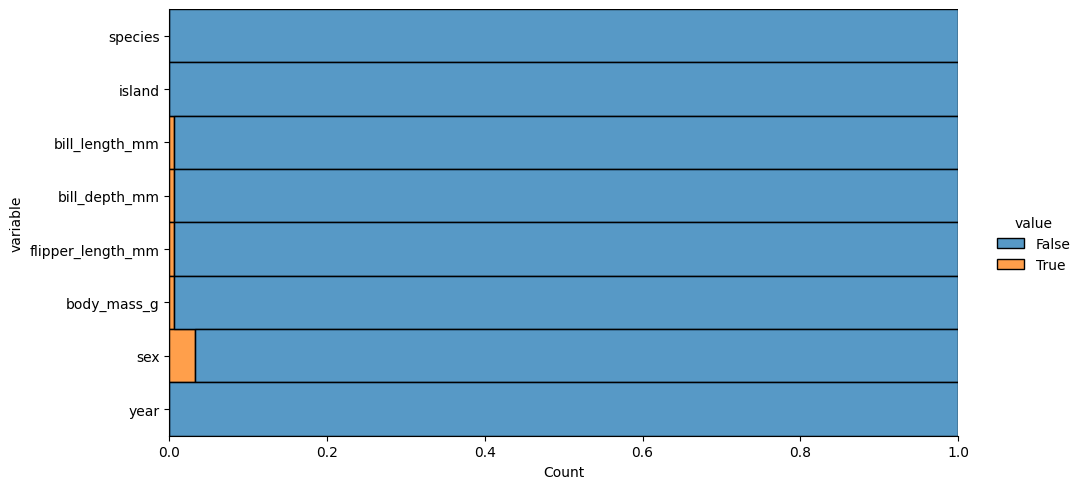

In [11]:
preprocess_penguins_df.isnull().melt().pipe(
    lambda df: (
                sns.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect =2)
                )
)

**5. ¿Cuántas observaciones perdemos si eliminamos elementos faltantes?**

In [12]:
process_penguins_df = preprocess_penguins_df.dropna()
process_penguins_df.shape

(333, 8)

Originalmente teníamos 344, al eliminar los valores nulos tenemos 333 por lo que no hubo gran pérdida de dataset.